# Image classifier problem
## Description: To classify whether image is happy or sad using Machine learning and nueral networks
### Steps to be followed in this project are:
1. Importing the Data of images 
2. Building a data pipeline
3. Creating a deep Nueral network classifier
4. Evaluating the data using the test set of images

# 1 Set up and load the data
### 1.1 The dependencies needed are 
1. Matplotlib
2. Tensorflow
3. Tensorflow-gpu
4. Opencv-python 
### 1.2 Import the necessary header files



In [3]:
import tensorflow as tf
import os #os is mainly used to navigate through file structures

In [4]:
#to check for number of gpus in the system, GPU makes computation easier
gpus=tf.config.experimental.list_physical_devices('CPU')
len(gpus)
#if OUT OF MEMORY or OOM error comes then no need to compute project as it means less storage on device

1

### 1.3 Remove dodgy images
Download a few images first and then use opencv to remove dodgy images

In [17]:
import cv2
import imghdr
import matplotlib
from matplotlib import pyplot as plt

In [6]:
data_dir='data'
os.listdir(data_dir)#func helps in listing folders inside given folder

['dogs', 'happy', 'cats', '.DS_Store', 'sad']

In [8]:
image_ext=['jpeg','jpg','png','bmp']
image_ext[1]#array of image extensions that will help in classifying the necessary images

'jpg'

In [9]:
for image_class in os.listdir(data_dir):#will traverse through data directory and return directories inside it
    print(image_class)

happy
.DS_Store
sad


In [22]:
os.remove('.DS_Store')

In [25]:
for image_class in os.listdir(data_dir):#both loops will traverse through all images in data folder
    for image in os.listdir(os.path.join(data_dir,image_class)):#is gonna help us go trhough every image in the directory stored in image_class
        image_path=os.path.join(data_dir,image_class,image)#takes the file path of every image
        try:
            img=cv2.imread(image_path)#demo is given below
            tip=imghdr.what(image_path)#imghdr over here helps in determining the filetype
            if tip not in image_ext:
                print('Image not in extensions list removing image {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print ('Issue with image {}'.format(image_path))

libpng warning: iCCP: known incorrect sRGB profile


Image not in extensions list removing image data/sad/depositphotos_188384672-stock-photo-desperate-and-sorrowful-woman-portrait.jpg
Image not in extensions list removing image data/sad/sad-person-pictures-2bnso9uiwlhrikrx.jpg
Image not in extensions list removing image data/sad/depositphotos_508407352-stock-photo-caucasian-male-sitting-floor-windows.jpg
Image not in extensions list removing image data/sad/depositphotos_596152428-stock-photo-grateful-woman-smiling-hope-successful.jpg
Image not in extensions list removing image data/sad/sad-serious-illness-womandepressed-emotion-260nw-1810793920.jpg
Image not in extensions list removing image data/sad/sitting-holding-head-in-hands-stressed-sad-young-male-having-mental-problems.jpg
Image not in extensions list removing image data/sad/105755492-sad-man-sitting-by-the-sea-concept-about-people-sadness-and-loneliness.jpg
Image not in extensions list removing image data/sad/39843138-sad-man.jpg
Image not in extensions list removing image data/

In [ ]:
img=cv2.imread(os.path.join('data','happy','35438_hd.jpg'))# using opencv to read an image as a numpy array
img.shape #will return dimensions in form of (l,b,x) where x is the type of channels that 3 bcuz it is a colour image
#type(img) -- will return the type of variable image that is numpy array
img

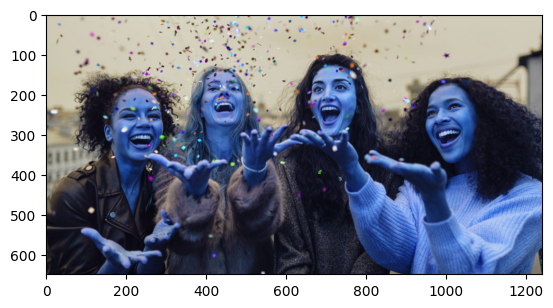

In [18]:
plt.imshow(img)#displays all the pics in bgr format instead of rgb

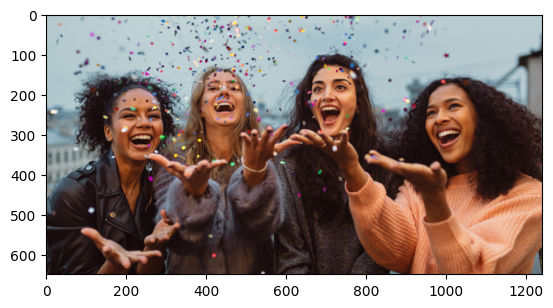

In [20]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))#converts bgr fromat to rgb
plt.show()

### 1.4 Load Data

To load the dataset using keras batch wise and assigning labels to the images  

In [26]:
tf.keras.utils.image_dataset_from_directory #will help i dividing data into batch sizes and as well as assign classes to the dataset itself(that is provides label for y)
#also helps in building the data pipeline
#also helps in resizing the images

<function keras.src.utils.image_dataset.image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, **kwargs)>

In [27]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [28]:
import numpy as np
from matplotlib import pyplot as plt

In [47]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 311 files belonging to 2 classes.


In [30]:
data_iterator=data.as_numpy_iterator()

#allowing us to acccess the data pipeline which is a batch of images

In [36]:
#Get another baatch from iterator
batch=data_iterator.next()
#allowing us to access the data of batch images itself and store it in the batch

In [37]:
batch #two parts of the dataset in batch first one is image representation in the form of numpy arrays and the other is the labels 0 and 1 where 0 and 1 are the classes assigned to happy and sad people

(array([[[[1.73785156e+02, 1.44785156e+02, 1.12570312e+02],
          [1.71677734e+02, 1.42677734e+02, 1.08677734e+02],
          [1.73685547e+02, 1.45222656e+02, 1.08537109e+02],
          ...,
          [1.20484375e+02, 1.63781250e+02, 2.12689453e+02],
          [1.10521484e+02, 1.47488281e+02, 1.84388672e+02],
          [1.33851562e+02, 1.67173828e+02, 1.98496094e+02]],
 
         [[1.73736908e+02, 1.44736908e+02, 1.12522057e+02],
          [1.71373291e+02, 1.42373291e+02, 1.08373283e+02],
          [1.73685547e+02, 1.45222656e+02, 1.08537109e+02],
          ...,
          [1.13412689e+02, 1.55328568e+02, 2.03304993e+02],
          [1.11928802e+02, 1.47692719e+02, 1.84143890e+02],
          [1.32184540e+02, 1.64560120e+02, 1.94631226e+02]],
 
         [[1.73522491e+02, 1.44522491e+02, 1.12307640e+02],
          [1.70891541e+02, 1.41891541e+02, 1.07891533e+02],
          [1.73565552e+02, 1.45102661e+02, 1.08417107e+02],
          ...,
          [1.03092270e+02, 1.43036957e+02, 1.8949

In [34]:
batch[0].shape #(32,256,256,3)=batch size, length wise pixels, breadth wise pixels,color image
batch[1].shape #1-D array of labels

(32,)

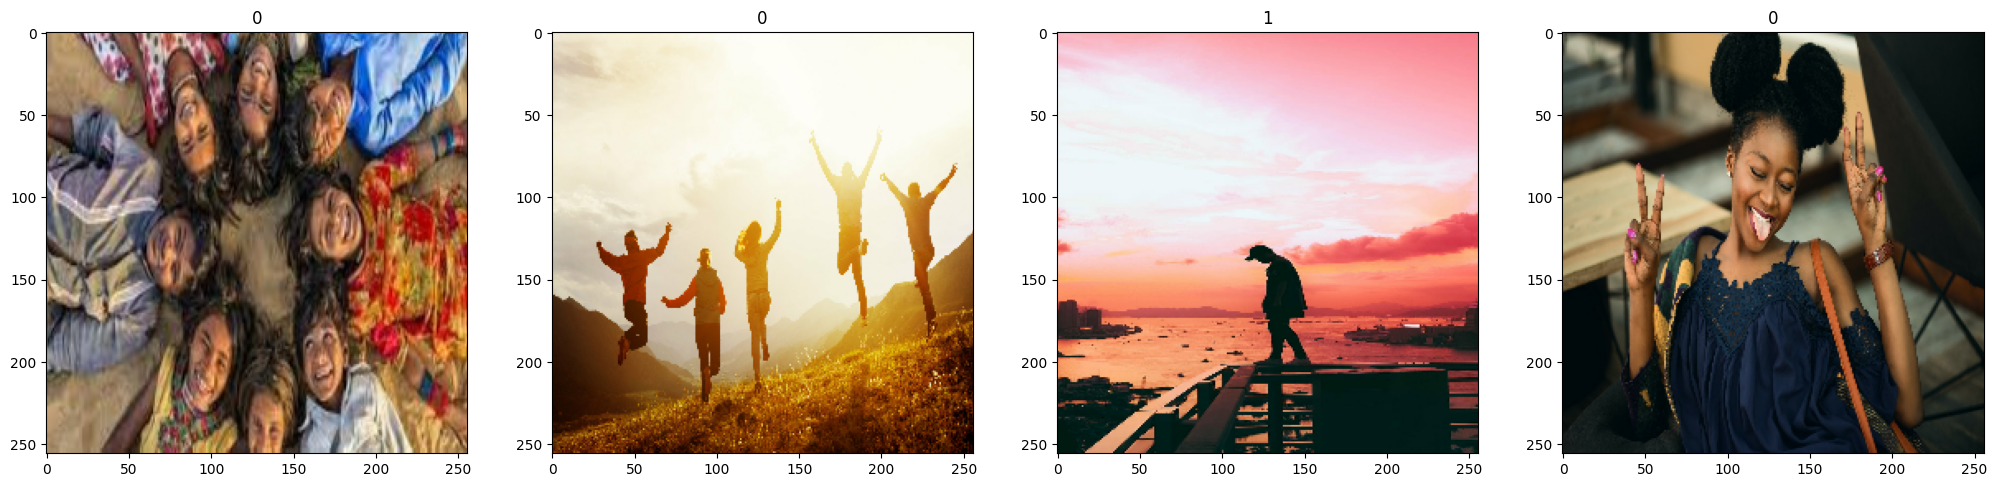

In [42]:
#dispalying 4 images in the batch to see which ones are assigned labels 1 and 0

fig,ax=plt.subplots(ncols=4, figsize=(25,25)) 
for idx,img in enumerate (batch[0][:4]): # to plot 4 images using pyplot
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#we can see it has assigned 1 for sad people and 0 for happy people and it works for all batches

# 2 Preprocess Data
The following are the steps to be followed:
1. Scale Data: When data was loaded above we had a size of image as 256*256 ie max value is 255.0 and min value is 0.0. By scaling we can optimize the deep learning model and produce better results
2. Split Data: Spliting the data into training, testing and validation datasets


Note:- We are accessing a data pipeline here instead of data so instead of  dividing everytime for each batch as shown below what we can do is dividing by 255 and loading at the same time

In [40]:
scale=batch[0]/255
scale.max()

1.0

### 2.1 Scale Data

In [48]:
data=data.map(lambda x,y:(x/255,y))

In [49]:
scaled_it=data.as_numpy_iterator()

In [50]:
batch=scaled_it.next()

2023-07-23 17:35:37.042190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


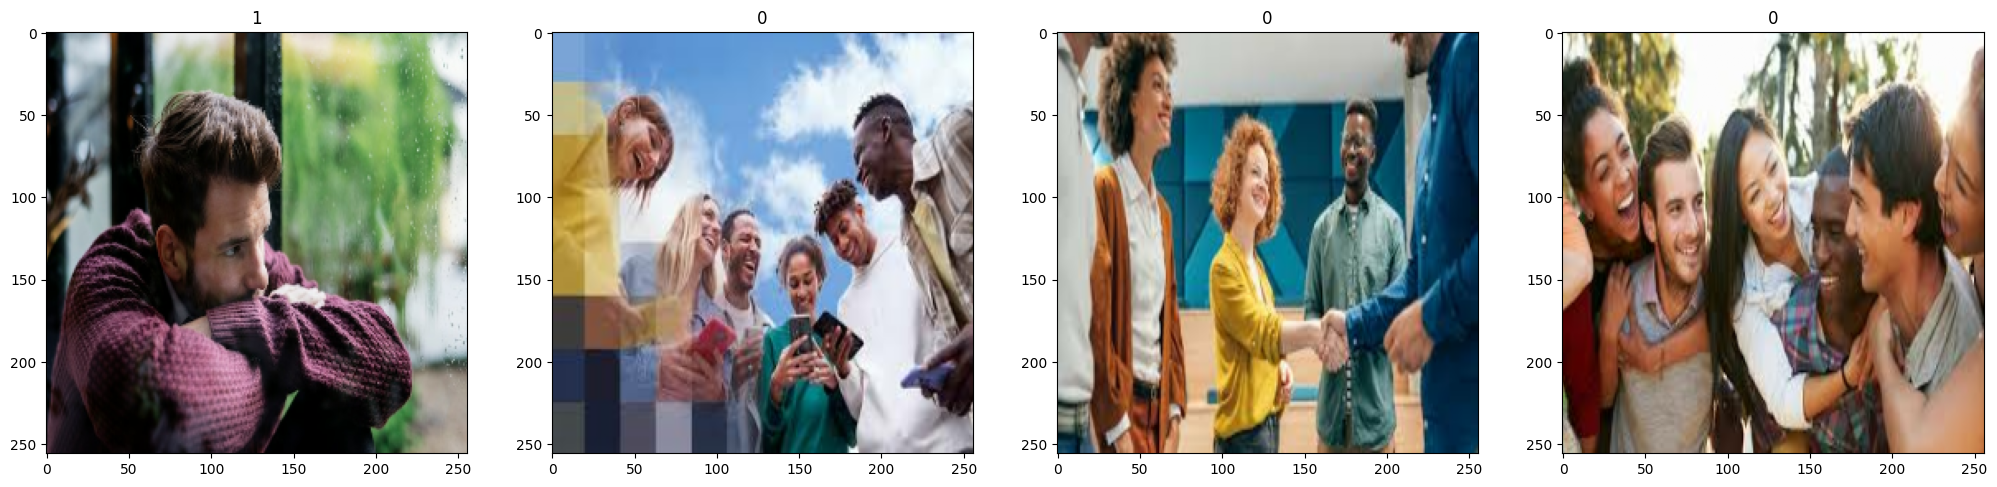

In [51]:
#to display image in batch after scaling the data
fig,ax=plt.subplots(ncols=4, figsize=(25,25)) 
for idx,img in enumerate (batch[0][:4]): # to plot 4 images using pyplot
    ax[idx].imshow(img)# cannot convert into int bcuz any number less than 255 divided by 255 will give zero
    ax[idx].title.set_text(batch[1][idx])

In [55]:
batch[0].max()#verified that scaling has happened properly

1.0

In [56]:
len(data)

10

### 2.2 Split Data

In [57]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)

In [61]:
test_size+ val_size+ train_size

10

In [62]:
train=data.take(train_size)#take defines how much data we are gonna take here into the 
val=data.skip(train_size).take(val_size)#skipping the training data and allocate the next data for validation
test=data.skip(train_size+ val_size).take(test_size)

In [66]:
len(val)

2